In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:

jam = pd.read_csv('jam.csv', header=None)
jam2 = pd.read_csv('jam_2.csv', header=None)
jam3 = pd.read_csv('jam_3.csv', header=None)
jam4 = pd.read_csv('jam_4.csv', header=None)
box = pd.read_csv('box.csv', header=None)

In [3]:
def load_first_frame(path, height=480, width=848):
    flat = pd.read_csv(path, header=None).values.flatten()
    frame_size = height * width

    if len(flat) % frame_size != 0:
        raise ValueError(f"File {path} cannot be evenly split into {height}x{width} frames.")

    frame_count = len(flat) // frame_size
    frames = flat.reshape((frame_count, height, width))
    return frames[0]  # or choose another frame, e.g., frames[-1] for last


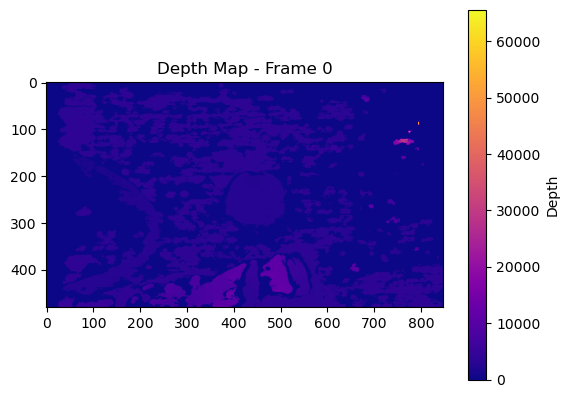

In [4]:


frame = jam.iloc[0].values.reshape((480, 848))
plt.imshow(frame, cmap='plasma')
plt.colorbar(label='Depth')
plt.title("Depth Map - Frame 0")
plt.show()

In [5]:
jam1 = load_first_frame('jam.csv')
jam2 = load_first_frame('jam_2.csv')
jam3 = load_first_frame('jam_3.csv')
jam4 = load_first_frame('jam_4.csv')
box = load_first_frame('box.csv')

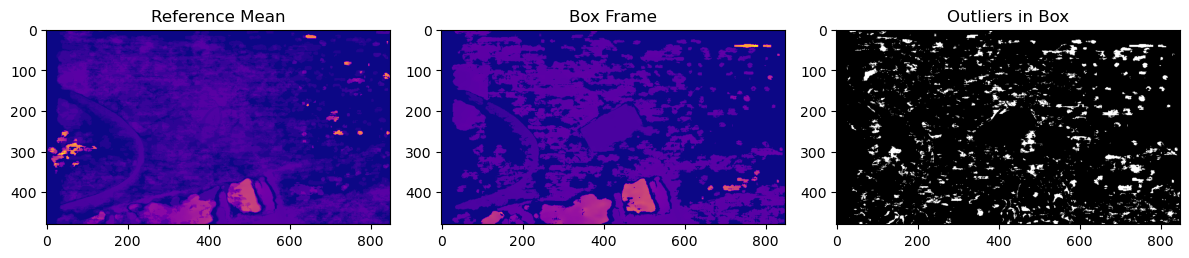

In [7]:
reference_mean = np.mean([jam1, jam2, jam3, jam4], axis=0)
reference_std = np.std([jam1, jam2, jam3, jam4], axis=0)

z_scores = (box - reference_mean) / (reference_std + 1e-6)
outlier_mask = np.abs(z_scores) > 3

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(reference_mean, cmap='plasma')
plt.title("Reference Mean")

plt.subplot(1, 3, 2)
plt.imshow(box, cmap='plasma')
plt.title("Box Frame")

plt.subplot(1, 3, 3)
plt.imshow(outlier_mask, cmap='gray')
plt.title("Outliers in Box")

plt.tight_layout()
plt.show()
